In [5]:
print("hello world")

hello world


In [1]:
import tensorflow as tf
import numpy as np
#官方入门demo
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print('Tensor version :{} {}'.format(tf.__version__," xxx"))


Tensor version :2.6.2  xxx


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:


model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test,  y_test, verbose=2)   

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 2.4416 - accuracy: 0.7579
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5860 - accuracy: 0.8463
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4579 - accuracy: 0.8773
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4174 - accuracy: 0.8893
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3930 - accuracy: 0.8981
313/313 - 0s - loss: 0.2794 - accuracy: 0.9352


[0.2793756127357483, 0.9351999759674072]

In [15]:
#自己学习的demo1:线性回归
#最简单的例子 线性回归， y=Wx+b，根据数据集合看看最终求出来的，W和b是否和产生数据的W和b一致
#创建一个数据集
import pandas as pd
x_data = np.random.rand(100).astype(np.float32)
y_data = x_data*0.1 + 0.3   #产生数据的W=0.1，b=0.3
data = pd.DataFrame({"X":x_data,"Y":y_data})
data.to_csv("line.csv")

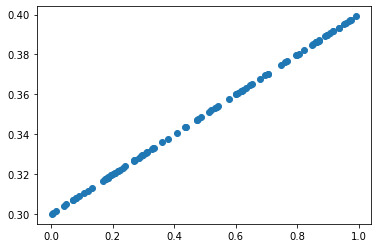

In [17]:
#查看一下生成的数据，是不是线性的
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(data.X,data.Y)

In [18]:
#我们来进行a和b，第一步是确定 预测函数f(x)和真实值之间的整体误差越小越好，这里称之为loss
#这里，采用均方差（方差的均值，不是标准差） sqrt(f(x)-y)/n，n为数据集合的数量
#为了更快的找到合适的值，需要优化，而采用梯度下降算法来求得上述均方差最小值时的W和b就是一种优化，也是tensorflow中优化


#创建顺序模型
model = tf.keras.Sequential()


In [19]:
#添加一个隐藏层，实际上就是y=ax+b的层,所以就是Param有两个参数.   输入为1维，输出也为1维,
model.add(tf.keras.layers.Dense(1, input_shape=(1,)))   
model.summary()  


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [23]:
#编译，实际上就是配置
#优化方法采用 adam
#损失函数采用 均方差

model.compile(optimizer='adam',loss='mse')

#训练 50 次
model.fit(x_data,y_data,epochs=500)


Epoch 1/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0101
Epoch 2/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0098
Epoch 3/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0096
Epoch 4/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0094
Epoch 5/500
4/4 [==============================] - 0s 1ms/step - loss: 0.0092
Epoch 6/500
4/4 [==============================] - 0s 1ms/step - loss: 0.0090
Epoch 7/500
4/4 [==============================] - 0s 1ms/step - loss: 0.0088
Epoch 8/500
4/4 [==============================] - 0s 1ms/step - loss: 0.0086
Epoch 9/500
4/4 [==============================] - 0s 3ms/step - loss: 0.0084
Epoch 10/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0083
Epoch 11/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0081
Epoch 12/500
4/4 [==============================] - 0s 1ms/step - loss: 0.0079
Epoch 13/500
4/4 [==============================] - 0s 2ms/st

In [25]:
#利用上述训练，进行预测,可以看到现在的值基本上就是20.3000，误差很小。这就是一个最简单的神经网络方式
model.predict(pd.Series(200))
#以上为第一个例子
#我们可以看到这个例子简单，但是还不如直接用求解二元一次方差的方式求解来的快，这里利用这个简单的例子来达到说明神经学习的概念，用sklearn传统机器学习也可以达到相同方式。



array([[20.300089]], dtype=float32)

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
